In [35]:
import nltk
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from yahoo_fin import options

from os import listdir
from os.path import isfile, join

In [352]:
data_path = 'result/'
test = [f for f in listdir(data_path) if isfile(join(data_path,f))]

In [353]:
test

['ALPHABET_20179_202010.csv',
 'AMAZON_.csv',
 'APPLE_20198_202010.csv',
 'BERKSHIRE HATHAWAY_20207_202010.csv',
 'FACEBOOK_20205_202010.csv',
 'JOHNSON & JOHNSON_20185_20187.csv',
 'MERCK AND CO_20202_202010.csv',
 'MICROSOFT_20208_202010.csv',
 'NIKE_20203_202010.csv',
 'NVIDIA_20179_201710.csv',
 'P&G_1.csv',
 'PFIZER_201911_202010.csv',
 'TESLA_.csv',
 'VISA_20205_202010.csv',
 'WALMART_20179_201710.csv']

In [354]:
def sentiment_declareation(sentiment_value):
    if -0.2 < sentiment_value <= 0.2:
        return 'neu'
    elif 0.2 < sentiment_value <= 1.0:
        return 'pos'
    elif -1.0 <= sentiment_value <= -0.2:
        return 'neg'

In [355]:
count = 0
for i in range(0,len(test)):
    dataset = pd.read_csv(data_path + test[i],encoding= 'unicode_escape')
    name = test[i][:test[i].find("_")]
    industry = [name for i in range(len(dataset))]
    dataset = pd.DataFrame({'Company':industry,'Date':dataset['date'], 'News Headline':dataset['title']})
    sia=SentimentIntensityAnalyzer()
    dataset['Compound'] = dataset['News Headline'].apply(lambda headline: sia.polarity_scores(headline)['compound'])
    dataset['Sentiment'] = dataset['Compound'].apply(lambda value: sentiment_declareation(value))
    #dataset['Date'] = pd.to_datetime(dataset.Date).dt.date
    
    
    if (count == 0):
        final_dataset = dataset
    else:
        final_dataset = pd.concat([final_dataset, dataset],ignore_index = True)
    count = count + 1

In [356]:
final_dataset['pos'] = final_dataset['Sentiment'] == 'pos'
final_dataset['neg'] = final_dataset['Sentiment'] == 'neg'
final_dataset['neu'] = final_dataset['Sentiment'] == 'neu'

In [357]:
final_dataset

,Company,Date,News Headline,Compound,Sentiment,pos,neg,neu
0,ALPHABET,2017-09-01,Alphabet to create separate business unit in E...,0.2732,pos,True,False,False
1,ALPHABET,2017-09-01,Google will separate its shopping business fro...,-0.2960,neg,False,True,False
2,ALPHABET,2017-09-01,"Google to treat shopping rivals equally, in li...",0.4019,pos,True,False,False
3,ALPHABET,2017-09-01,Will Alphabet's new structure make Google's bu...,0.0000,neu,False,False,True
4,ALPHABET,2017-09-01,Alphabet forms holding company called XXVI for...,0.0000,neu,False,False,True
...,...,...,...,...,...,...,...,...
33892,WALMART,2020-09-01,Walmart?Âs latest PS5 preorders were gone in ...,0.0000,neu,False,False,True
33893,WALMART,2020-09-01,"Walmart to offer employees more pay, more resp...",-0.1761,neu,False,False,True
33894,WALMART,2020-09-01,"Walmart Strikes TV Measurement, Analytics Deal...",-0.3612,neg,False,True,False
33895,WALMART,2020-09-01,"After Fatal Shooting In Walmart Parking Lot, L...",-0.8481,neg,False,True,False


In [358]:
final_company = list(final_dataset.groupby(by = ['Company','Date']).count().reset_index()['Company'])
final_date = list(final_dataset.groupby(by = ['Company','Date']).count().reset_index()['Date'])
final_mean = list(final_dataset.groupby(by = ['Company','Date'])['Compound'].mean())
final_pos = list(final_dataset.groupby(by = ['Company','Date'])['pos'].sum())
final_neg = list(final_dataset.groupby(by = ['Company','Date'])['neg'].sum())
final_neu = list(final_dataset.groupby(by = ['Company','Date'])['neu'].sum())

In [361]:
A = pd.DataFrame({'Company':final_company, 'Date':final_date,'mean':final_mean, 'pos' : final_pos, 'neg' : final_neg, 'neu':final_neu})

In [362]:
A

,Company,Date,mean,pos,neg,neu
0,ALPHABET,2017-09-01,0.036231,15.0,8.0,73.0
1,ALPHABET,2017-10-01,0.075615,21.0,10.0,61.0
2,ALPHABET,2017-11-01,0.005836,17.0,16.0,62.0
3,ALPHABET,2017-12-01,0.041672,23.0,11.0,62.0
4,ALPHABET,2018-01-01,0.106406,26.0,8.0,62.0
...,...,...,...,...,...,...
550,WALMART,2020-05-01,-0.017700,17.0,22.0,57.0
551,WALMART,2020-06-01,-0.039328,17.0,23.0,54.0
552,WALMART,2020-07-01,-0.023563,14.0,19.0,57.0
553,WALMART,2020-08-01,0.030407,20.0,18.0,56.0


In [363]:
A.to_csv('textmining_result/google_master.csv', index = False)

### 시각화

In [370]:
import numpy as np

In [403]:
A = pd.read_csv('textmining_result/google_master.csv')

In [384]:
A

,Company,Date,mean,pos,neg,neu
0,ALPHABET,2017-09-01,0.036231,15.0,8.0,73.0
1,ALPHABET,2017-10-01,0.075615,21.0,10.0,61.0
2,ALPHABET,2017-11-01,0.005836,17.0,16.0,62.0
3,ALPHABET,2017-12-01,0.041672,23.0,11.0,62.0
4,ALPHABET,2018-01-01,0.106406,26.0,8.0,62.0
...,...,...,...,...,...,...
550,WALMART,2020-05-01,-0.017700,17.0,22.0,57.0
551,WALMART,2020-06-01,-0.039328,17.0,23.0,54.0
552,WALMART,2020-07-01,-0.023563,14.0,19.0,57.0
553,WALMART,2020-08-01,0.030407,20.0,18.0,56.0


In [415]:
list(A[A['Company'] == stock[0]]['Date'])

['2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-06-01',
 '2019-07-01',
 '2019-08-01',
 '2019-09-01',
 '2019-10-01',
 '2019-11-01',
 '2019-12-01',
 '2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01']

In [404]:
industry_data = 'Cnsmr'

In [408]:
class visual:
    def show_graph(input,industry_data):
        if (industry_data == 'Cnsmr'):
            stock = ['AMAZON', 'WALMART','NVIDIA']
        elif (industry_data == 'Manuf'):
            stock = ['TESLA','P&G','NIKE']
        elif (industry_data == 'HiTec'):
            stock = ['APPLE', 'MICROSOFT', 'FACEBOOK']
        elif (industry_data == 'Hlth'):
            stock = ['JOHNSON & JOHNSON', 'PFIZER', 'MERCK AND CO']
        elif (industry_data == 'Other'):
            stock = ['ALPHABET', 'BERKSHIRE HATHAWAY', 'VISA']


        mean0 = list(A[A['Company'] == stock[0]]['mean'])
        mean1 = list(A[A['Company'] == stock[1]]['mean'])
        mean2 = list(A[A['Company'] == stock[2]]['mean'])

        mean = [mean0,mean1,mean2]
        return stock, mean

In [409]:
e = visual()
stock1, mean1 = e.show_graph(industry_data)

In [413]:
stock1

['AMAZON', 'WALMART', 'NVIDIA']

In [411]:
mean1

[[0.1982893617021277,
  0.167576288659794,
  0.114843085106383,
  0.15074736842105246,
  0.18002991071428598,
  0.1183012345679012,
  0.18347849462365576,
  0.09261397849462366,
  0.13450736842105254,
  0.17877765957446803,
  0.1935847826086957,
  0.2252979591836736,
  0.2037631578947368,
  0.19179787234042556,
  0.1952648936170212,
  0.2297967741935484,
  0.2139468085106383,
  0.12603195876288656,
  0.09681938775510204,
  0.21148873239436614,
  0.14019072164948435,
  0.17696666666666652,
  0.15640210526315776,
  0.11930000000000003,
  0.20915056179775288,
  0.12916935483870975,
  0.15086595744680845,
  0.10086595744680846,
  0.10703645833333328,
  0.23407959183673474,
  0.15816276595744674,
  0.1458861702127659,
  0.14471727272727258,
  0.1927102040816326,
  0.17792222222222212,
  0.1381626262626262,
  0.15779999999999986],
 [0.054742857142857135,
  -0.0673622222222222,
  -0.08931395348837211,
  -0.03611368421052633,
  -0.03256086956521737,
  -0.02788409090909091,
  -0.115033673469387

[]

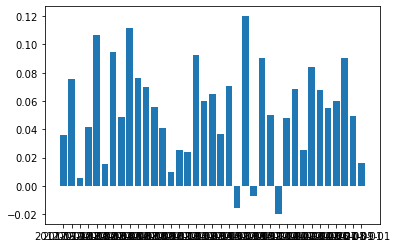

In [380]:
x = np.arange(37)
plt.bar(x,A[A['Company'] == 'ALPHABET']['mean'])
plt.xticks(x,A[A['Company'] == 'ALPHABET']['Date'])
#plt.show()
plt.plot()

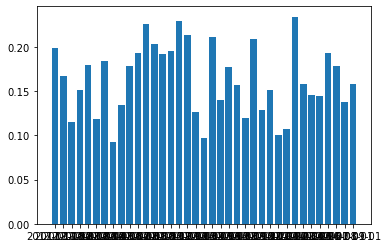

In [377]:
x = np.arange(37)
plt.bar(x,A[A['Company'] == 'AMAZON']['mean'])
plt.xticks(x,A[A['Company'] == 'AMAZON']['Date'])
plt.show()

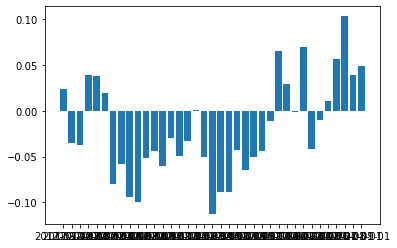

In [376]:
x = np.arange(37)
plt.bar(x,A[A['Company'] == 'TESLA']['mean'])
plt.xticks(x,A[A['Company'] == 'TESLA']['Date'])
plt.show()

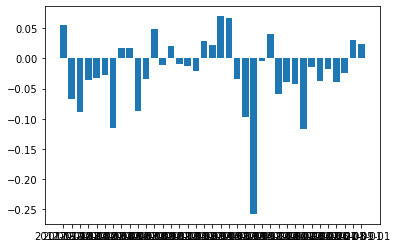

In [375]:
x = np.arange(37)
plt.bar(x,A[A['Company'] == 'WALMART']['mean'])
plt.xticks(x,A[A['Company'] == 'WALMART']['Date'])
plt.show()